Regresión robusta usando RANSAC (RANdom SAmple Consensus)
=====

* Ajusta un modelo a partir de subconjuntos aleatorios de inliers del dataset completo.

* Es un algoritmo aleatorio que produce un resultado rasonable con cierta probabilidad que es dependiente de la cantidad de iteraciones (`max_iter`).

* El algoritmo divide el conjunto completo de datos en un conjunto de inliers, que podrían estar sujetos a ruido, y un conjunto de outliers, los cuales causan medidas errones.

* El algoritmo consta de dos pasos que son repetidos iterativamente.

* En el Paso 1, se selecciona aleatoriamente un subconjunto mínimo de datos del dataset original, y se estima el modelo usando estos puntos.

* En el Paso 2, se verifican cuantos datos del dataset original son consistentes con el modelo; esto es, cuantos son inliers y cuanto son outliers. Los inliers son adicionados al dataset para entrenamiento del modelo.

* El mejor modelo es aquel que tiene la mayor cantidad de puntos clasificados como inliers.

* El modelo es estimado únicamente con los inliers.

Fuente: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html#sphx-glr-auto-examples-linear-model-plot-ransac-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

#
# Adiciona outliers a los datos
#
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

In [2]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()
linearRegression.fit(X, y)

LinearRegression()

In [3]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(
    # -------------------------------------------------------------------------
    # Base estimator object. If None then LinearRegression is used.
    estimator=None,
    # -------------------------------------------------------------------------
    # Minimum number of samples chosen randomly from original data. 
    # By default it is computed as X.shape[1] + 1
    min_samples=None,
    # -------------------------------------------------------------------------
    # Maximum residual for a data sample to be classified as an inlier. By 
    # default the threshold is chosen as the MAD (median absolute deviation) of 
    # the target values y. Points whose residuals are strictly equal to the 
    # threshold are considered as inliers.
    residual_threshold=None,
    # -------------------------------------------------------------------------
    # Maximum number of iterations for random sample selection.
    max_trials=100, 
    # -------------------------------------------------------------------------
    # Loss function
    loss='absolute_error',
    # -------------------------------------------------------------------------
    # Seed of random number generator.
    random_state=None,
)

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

Coeficientes:
 82.1904
 54.1724
 82.0853



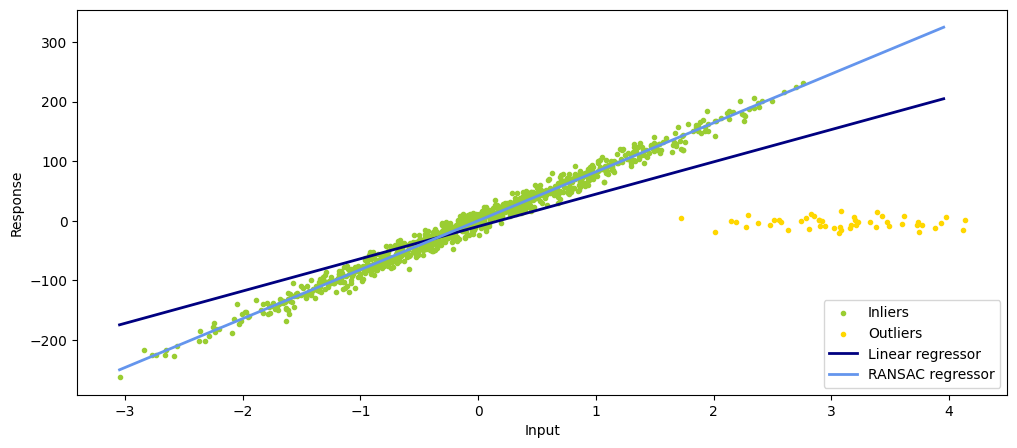

In [4]:
import matplotlib.pyplot as plt

#
# Pronostico
#
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

line_y = linearRegression.predict(line_X)
line_y_ransac = ransac.predict(line_X)

#
# Comparación de los coeficientes
#
print("Coeficientes:")
print(
    "{:8.4f}\n{:8.4f}\n{:8.4f}\n".format(
        float(coef),
        float(linearRegression.coef_[0]),
        float(ransac.estimator_.coef_),
    )
)

#
# Gráfica
#
plt.figure(figsize=(12, 5))

lw = 2
plt.scatter(
    X[inlier_mask],
    y[inlier_mask],
    color="yellowgreen",
    marker=".",
    label="Inliers",
)
plt.scatter(
    X[outlier_mask],
    y[outlier_mask],
    color="gold",
    marker=".",
    label="Outliers",
)
plt.plot(
    line_X,
    line_y,
    color="navy",
    linewidth=lw,
    label="Linear regressor",
)
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()